In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.faces.faces_data import get_faces_dataset
import common_grid_search_analysis
import TrainingCurves

import numpy as np
import pandas  as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit


In [2]:
GS_FILE_NAME_PREFIX = "Analysis_Data/FACES_DECISION_TREE"

PLOT_SAVE_LOCATION = "Figures/"
ALGO = "Decision Trees"
DATASET = "Faces"
GLOBAL_FIG_COUNTER = 0

default_title = "{} Default Learning Curve\n Data Set: {}".format(ALGO, DATASET)
final_title = "{} Final Tuning Learning Curve\n Data Set: {}".format(ALGO, DATASET)

ylim=(0.5, 1.05)

In [3]:
# Load Data
import DecisionTrees.common_decision_tree as common_decision_tree
X_train, X_test, y_train, y_test = get_faces_dataset()
num_features = X_train.shape[1]


In [4]:
# Start with Learning Curve on Default Classifier
default_train_sizes, default_train_scores, default_test_scores, default_fit_times, default_score_times = TrainingCurves.perform_learning_curve(tree.DecisionTreeClassifier(criterion='gini'), X_train, y_train, "accuracy")


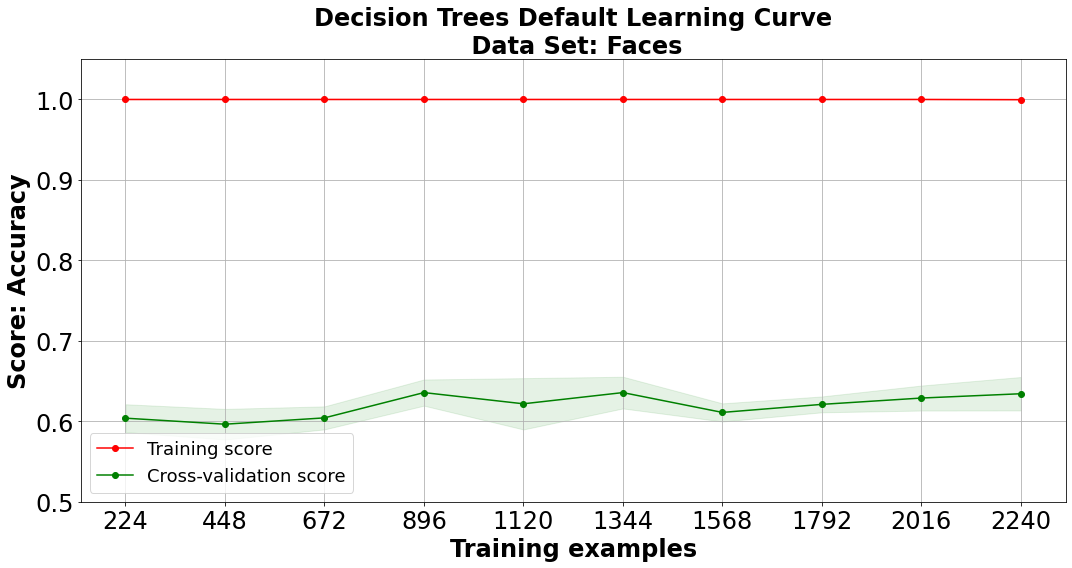

In [5]:
ylim=(0.5, 1.05)
TrainingCurves.plot_learning_curve(default_train_scores, default_test_scores, default_train_sizes, default_title, ylim=ylim)


In [6]:
ccp_alpha = np.arange(0.0, 0.01, 0.0002)

criterion = ['gini', 'entropy']
min_samples_split = [i for i in range(2, 200, 5)]
min_samples_leaf = [i for i in range(1, 200, 5)]
max_depth = [i for i in range(1, 100, 1)]
max_features = [i for i in range(num_features)]



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.9s finished


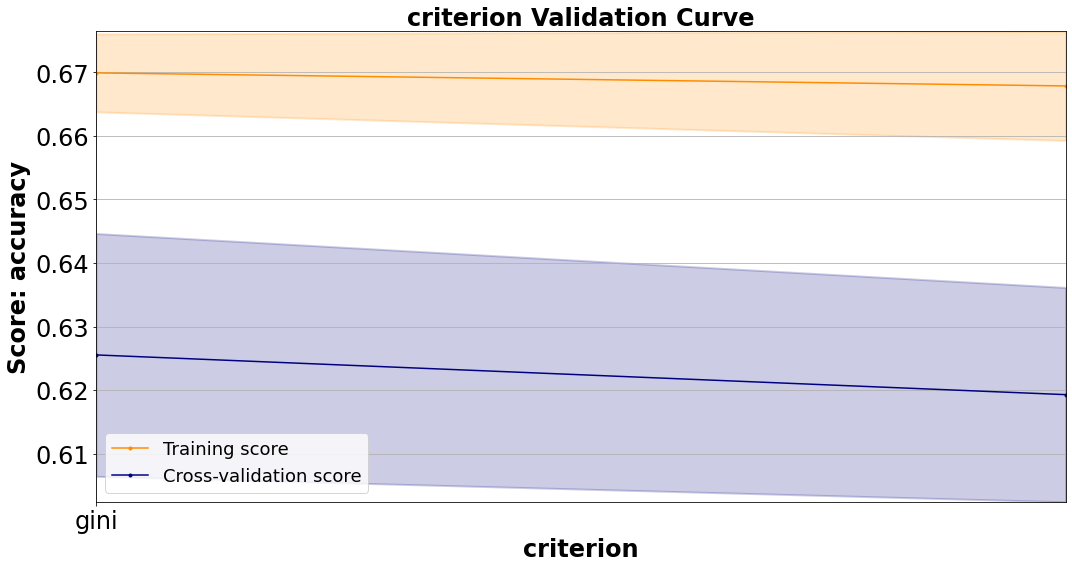

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:   43.6s finished


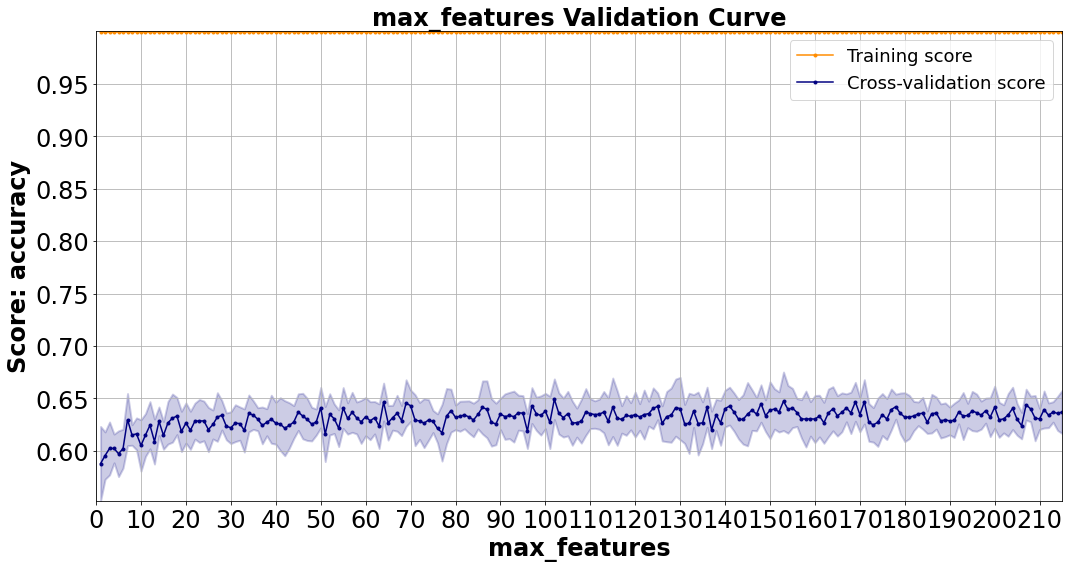

In [7]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(max_depth=4, max_features=11), X_train, y_train, "criterion", criterion, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "criterion", criterion, title="criterion Validation Curve", scoring="accuracy", tick_spacing=2)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(), X_train, y_train, "max_features", max_features, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_features", max_features, title="max_features Validation Curve", scoring="accuracy", tick_spacing=10)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 990 out of 990 | elapsed:    3.7s finished


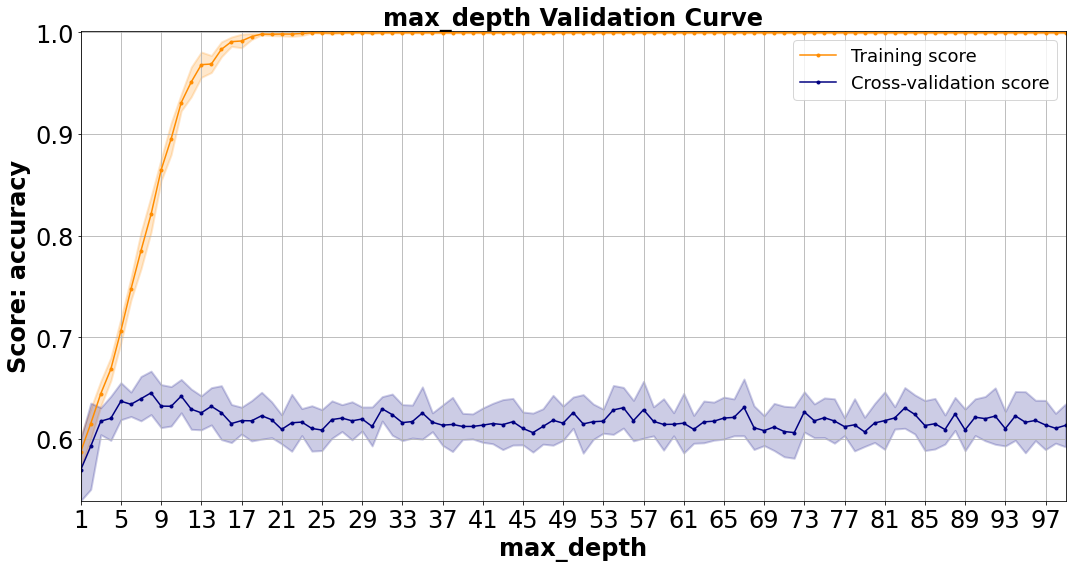

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.9s finished


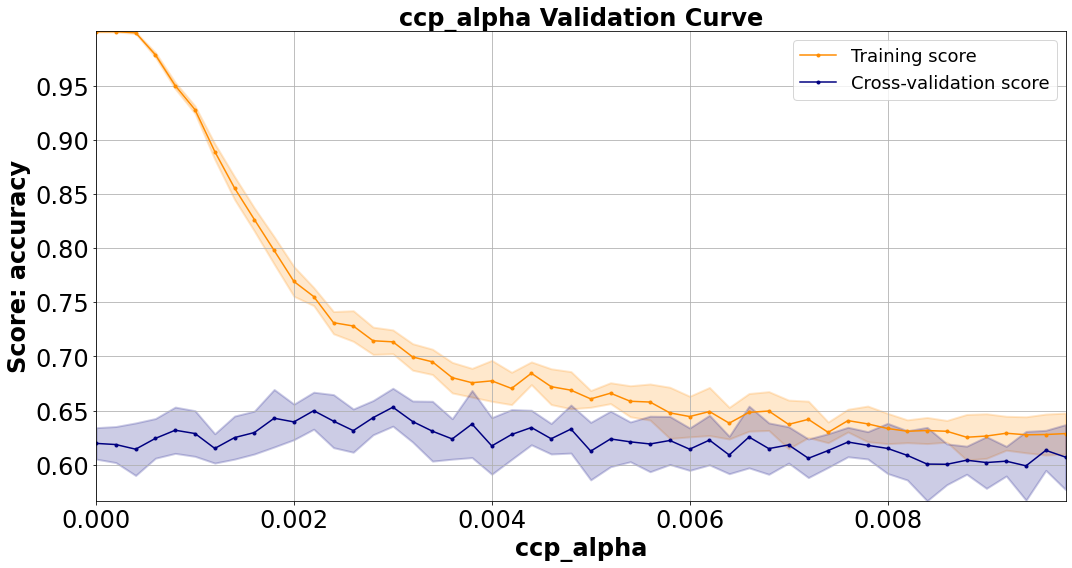

In [8]:
test_parameters = {"max_features": 11}

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "max_depth", max_depth, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_depth", max_depth, title="max_depth Validation Curve", scoring="accuracy", tick_spacing=4)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "ccp_alpha", ccp_alpha, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "ccp_alpha", ccp_alpha, title="ccp_alpha Validation Curve", scoring="accuracy", tick_spacing=10)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    4.2s finished


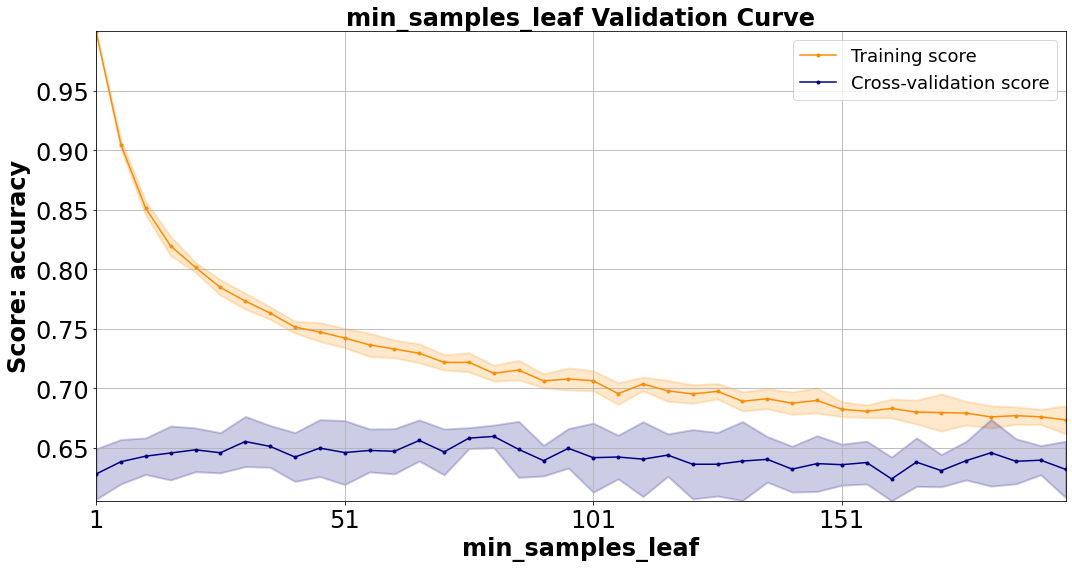

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    7.2s finished


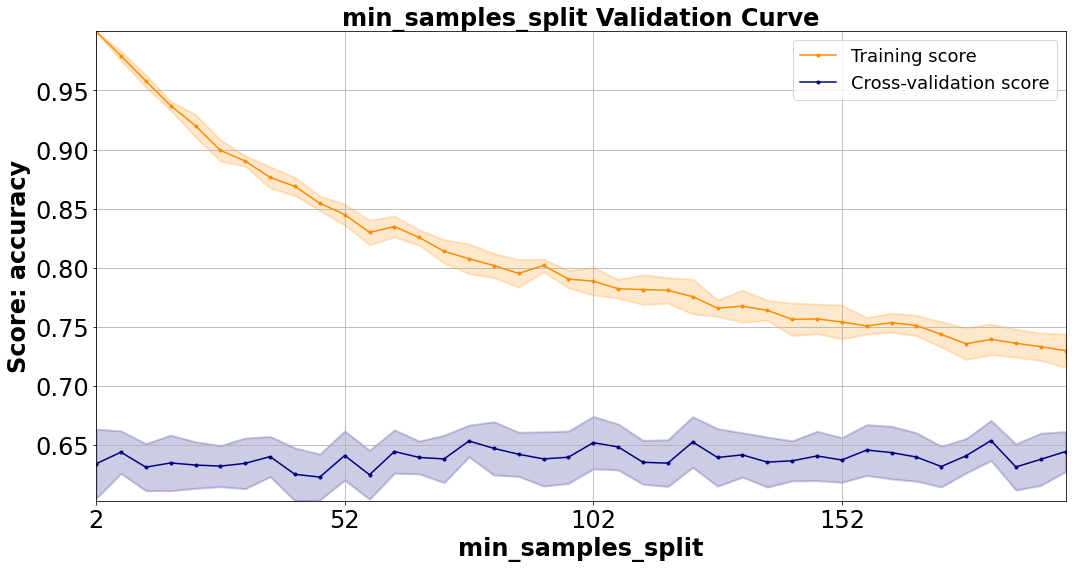

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 990 out of 990 | elapsed:    2.6s finished


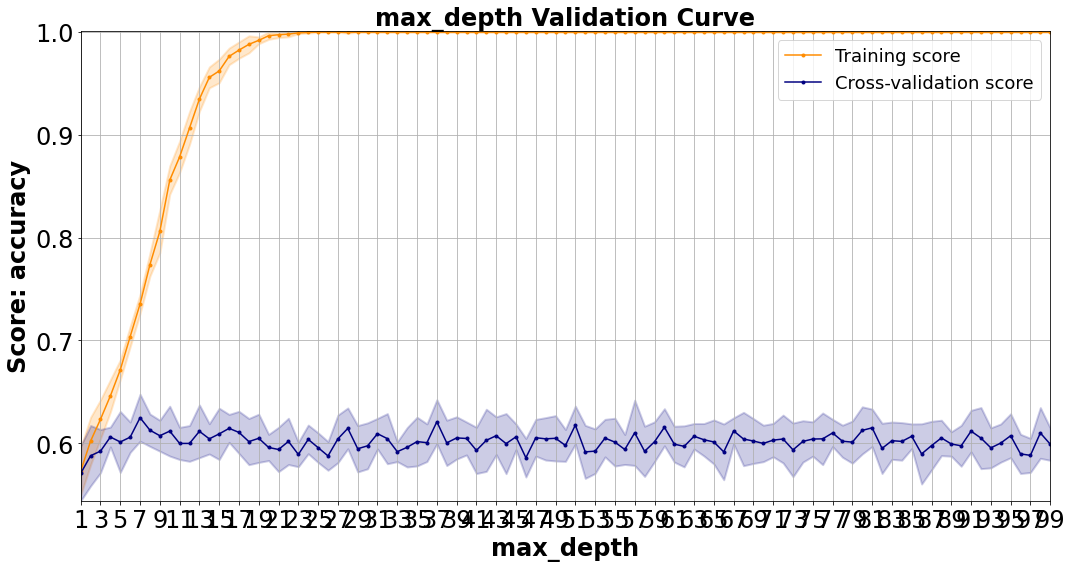

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.4s finished


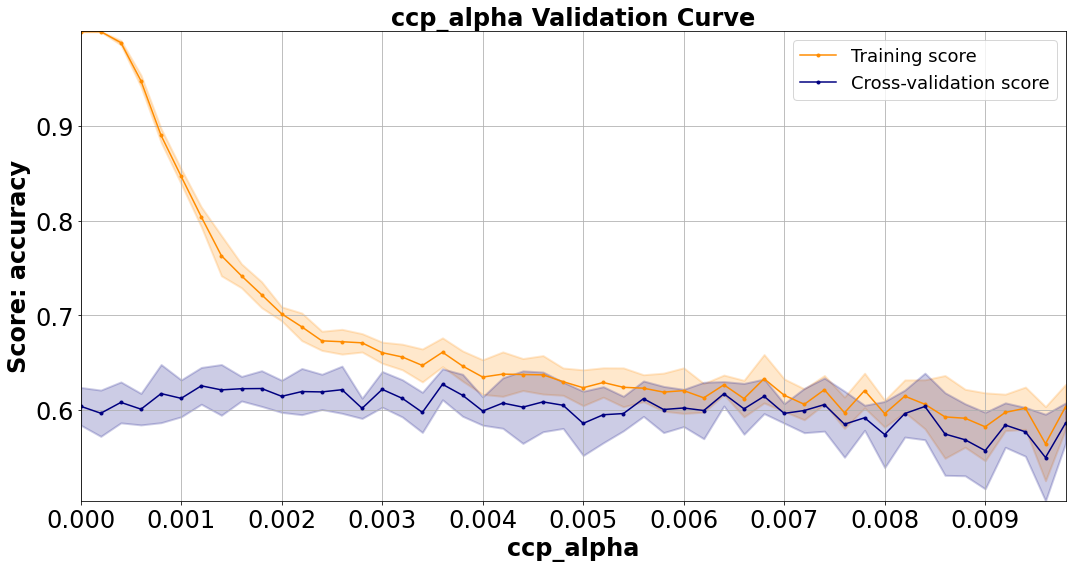

In [9]:
test_parameters = {'criterion': 'gini', 'max_features': num_features//2, 'max_depth': 100, 'ccp_alpha': 0.0001}
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "min_samples_leaf", min_samples_leaf, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "min_samples_leaf", min_samples_leaf, title="min_samples_leaf Validation Curve", scoring="accuracy", tick_spacing=10)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(**test_parameters), X_train, y_train, "min_samples_split", min_samples_split, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "min_samples_split", min_samples_split, title="min_samples_split Validation Curve", scoring="accuracy", tick_spacing=10)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(max_features=3), X_train, y_train, "max_depth", max_depth, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_depth", max_depth, title="max_depth Validation Curve", scoring="accuracy", tick_spacing=2)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(tree.DecisionTreeClassifier(max_features=3), X_train, y_train, "ccp_alpha", ccp_alpha, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "ccp_alpha", ccp_alpha, title="ccp_alpha Validation Curve", scoring="accuracy", tick_spacing=5)


In [10]:
ccp_alpha = np.arange(0.0, 0.008, 0.0002)

criterion = ['gini', 'entropy']
min_samples_split = [i for i in range(2, 200, 5)]
min_samples_leaf = [i for i in range(1, 500, 10)]
max_depth = [i for i in range(1, 25, 2)]
max_features = [i for i in range(1, num_features//2+10, 2)]

parameters = {'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'ccp_alpha': ccp_alpha, "max_depth": max_depth}

parameters = {'max_features': max_features, 'ccp_alpha': ccp_alpha, "max_depth": max_depth}

default_parameters = {'criterion': 'gini', 'max_features': num_features//2}
gs = common_decision_tree.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX= GS_FILE_NAME_PREFIX, default_parameters=default_parameters)

gs_results = gs

NOT performing Grid Search


Plot saved as:  Figures/Faces_Decision Trees_GS_ModelComplexity_ccp_alpha_max_depth_max_features.png


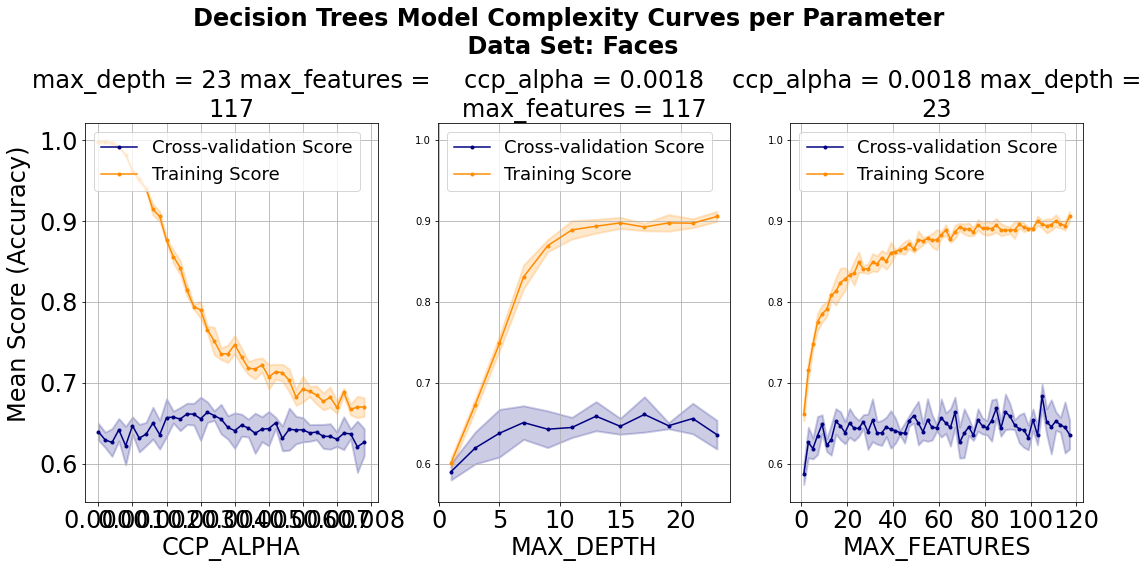

In [11]:
unused_params_values = {'min_samples_leaf': min(min_samples_leaf), 'min_samples_split': min(min_samples_split), 'max_features': max(max_features)}

common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_values)

Plot saved as:  Figures/Faces_Decision Trees_GS_Times_ccp_alpha_max_depth_max_features.png


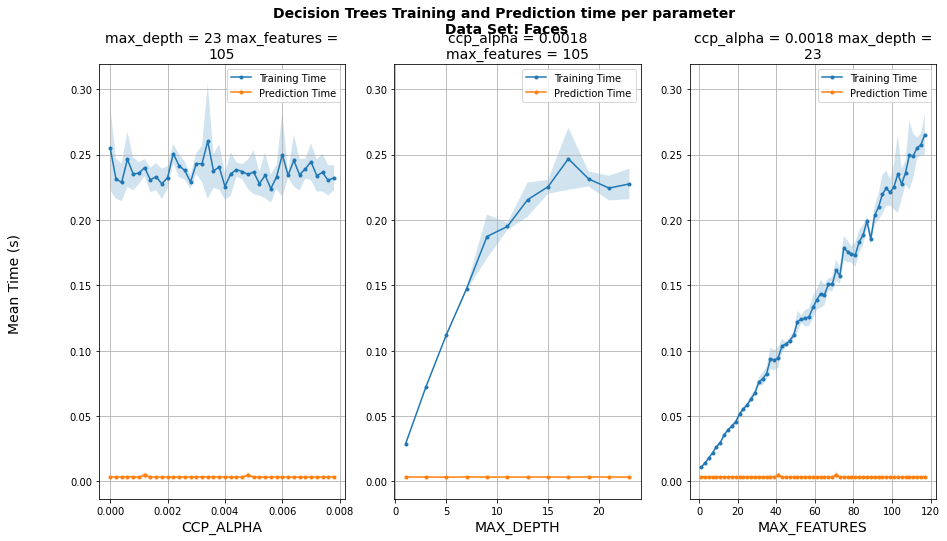

In [12]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET)

{'ccp_alpha': 0.0, 'max_depth': 23, 'max_features': 117}
Plot saved as:  Figures/Faces_Decision Trees_GS_ModelComplexity_ccp_alpha_max_depth_max_features.png


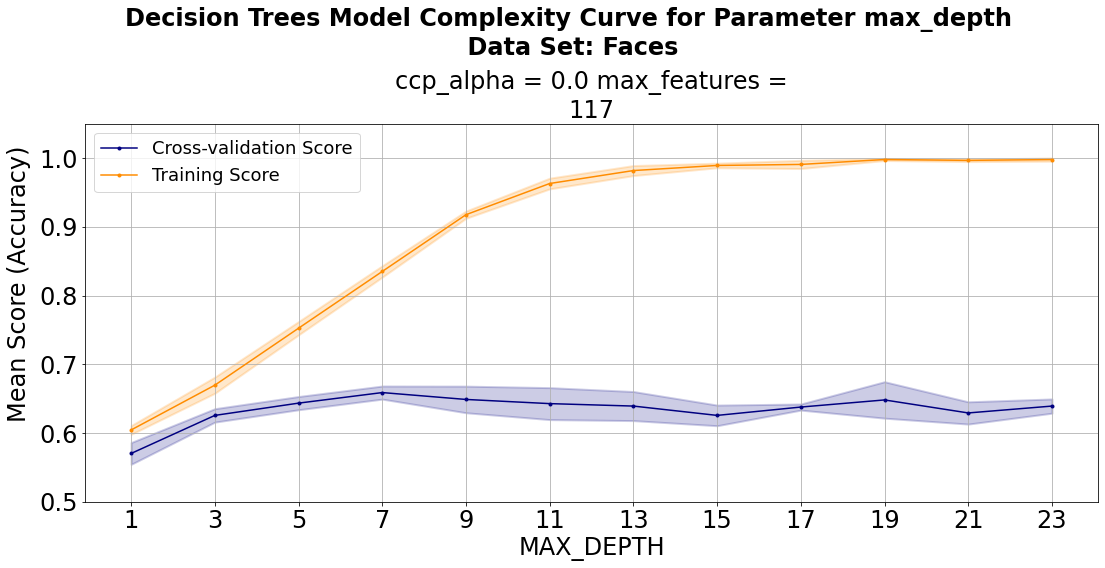

Plot saved as:  Figures/Faces_Decision Trees_GS_ModelComplexity_ccp_alpha_max_depth_max_features.png


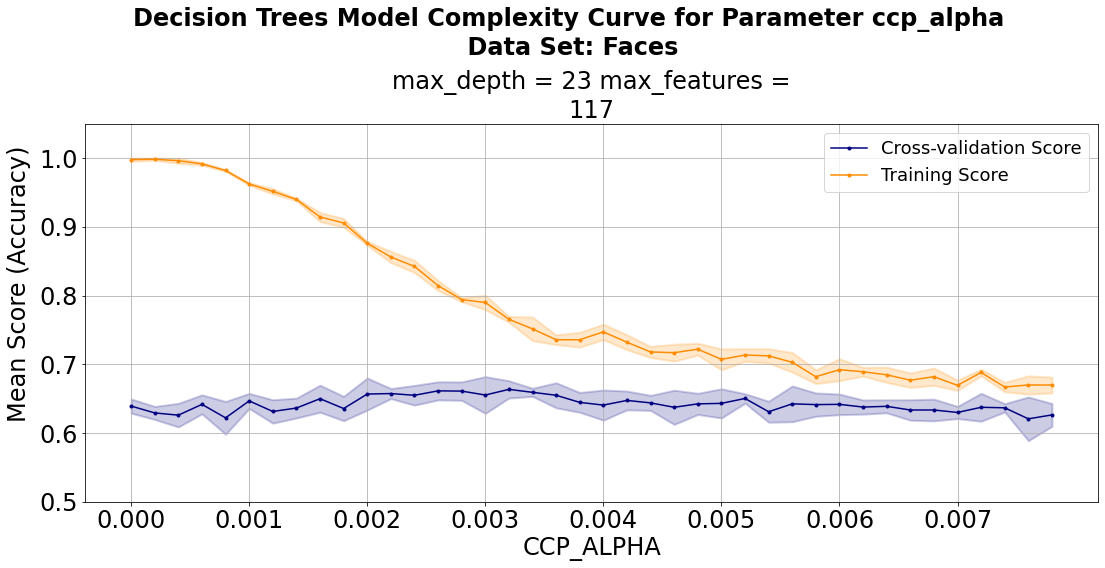

Plot saved as:  Figures/Faces_Decision Trees_GS_ModelComplexity_ccp_alpha_max_depth_max_features.png


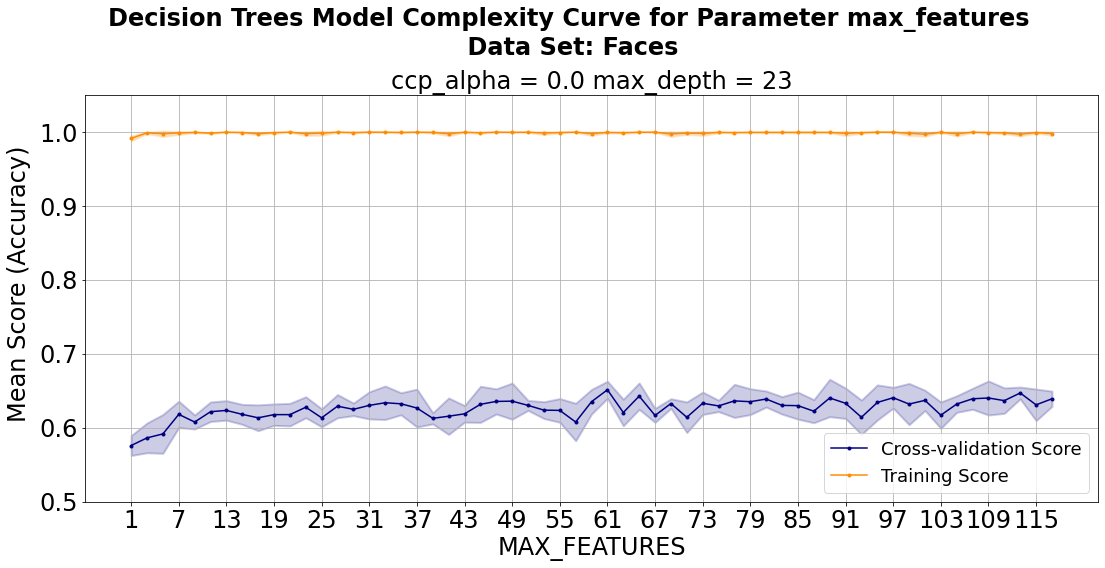

In [13]:
unused_params = {'ccp_alpha': min(ccp_alpha), 'max_depth': max(max_depth), 'max_features': max(max_features)}
print(unused_params)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'max_depth', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=1)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'ccp_alpha', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=5)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'max_features', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=3)

{'ccp_alpha': 0.0, 'max_depth': 5, 'max_features': 117}
Plot saved as:  Figures/Faces_Decision Trees_GS_ModelComplexity_ccp_alpha_max_depth_max_features.png


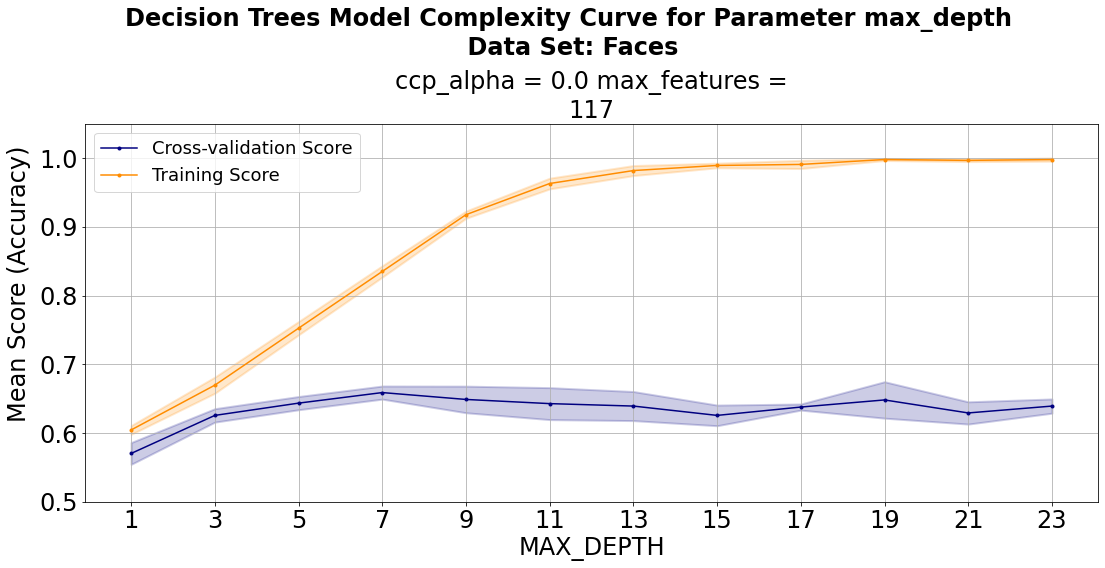

Plot saved as:  Figures/Faces_Decision Trees_GS_ModelComplexity_ccp_alpha_max_depth_max_features.png


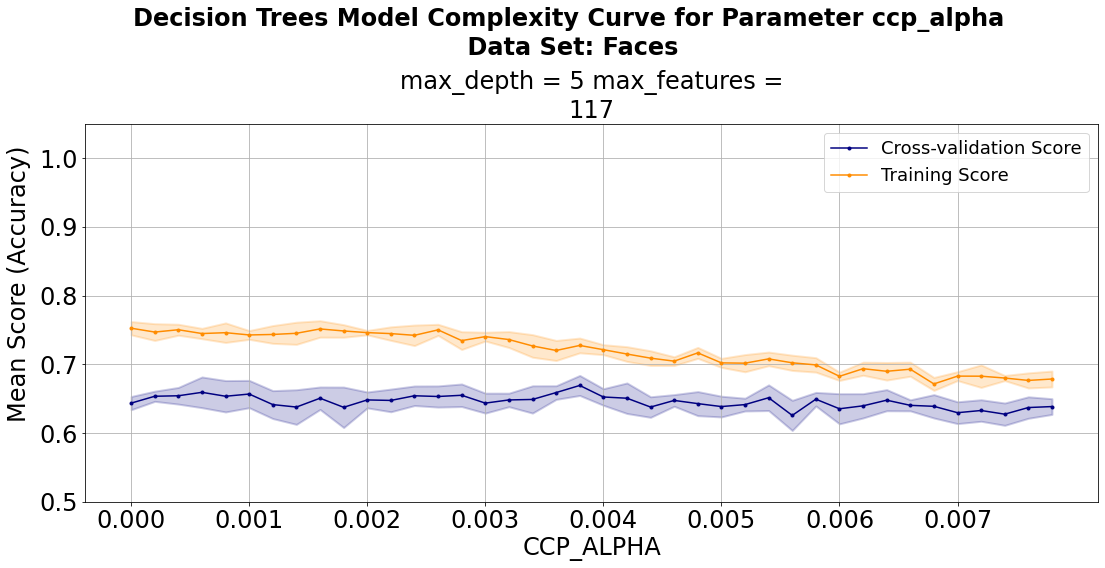

Plot saved as:  Figures/Faces_Decision Trees_GS_ModelComplexity_ccp_alpha_max_depth_max_features.png


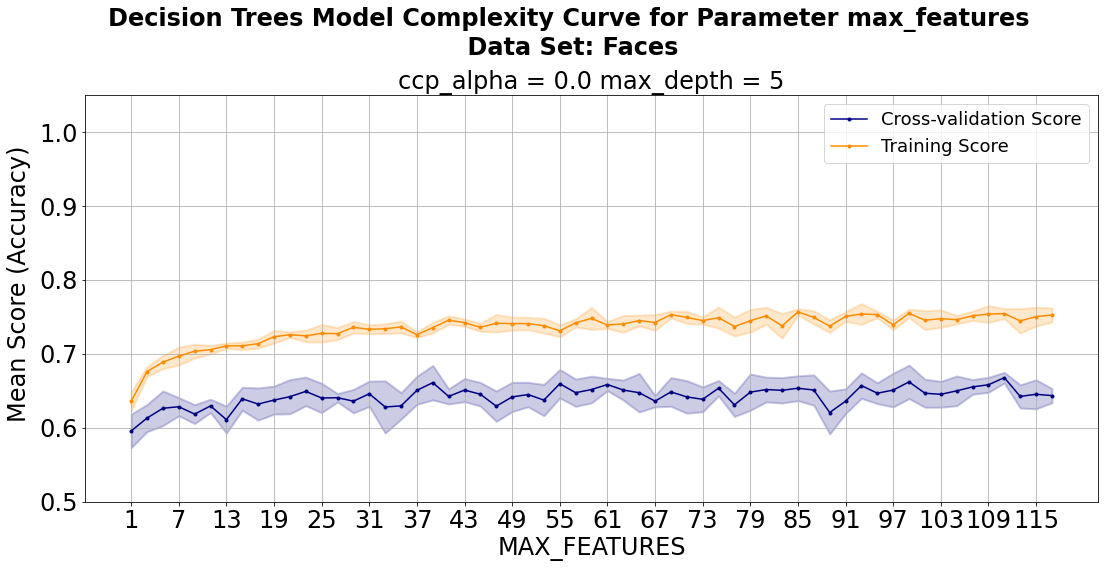

In [14]:
unused_params = {'ccp_alpha': min(ccp_alpha), 'max_depth': 5, 'max_features': max(max_features)}
print(unused_params)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'max_depth', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=1)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'ccp_alpha', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=5)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'max_features', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=3)

{'ccp_alpha': 0.0, 'max_depth': 23, 'max_features': 5}
Plot saved as:  Figures/Faces_Decision Trees_GS_ModelComplexity_ccp_alpha_max_depth_max_features.png


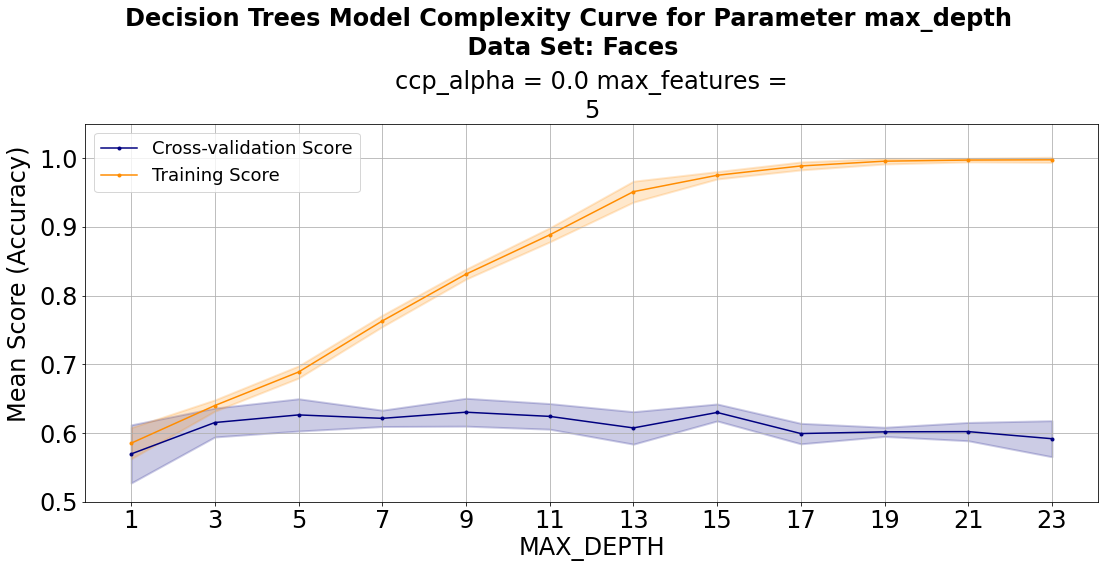

Plot saved as:  Figures/Faces_Decision Trees_GS_ModelComplexity_ccp_alpha_max_depth_max_features.png


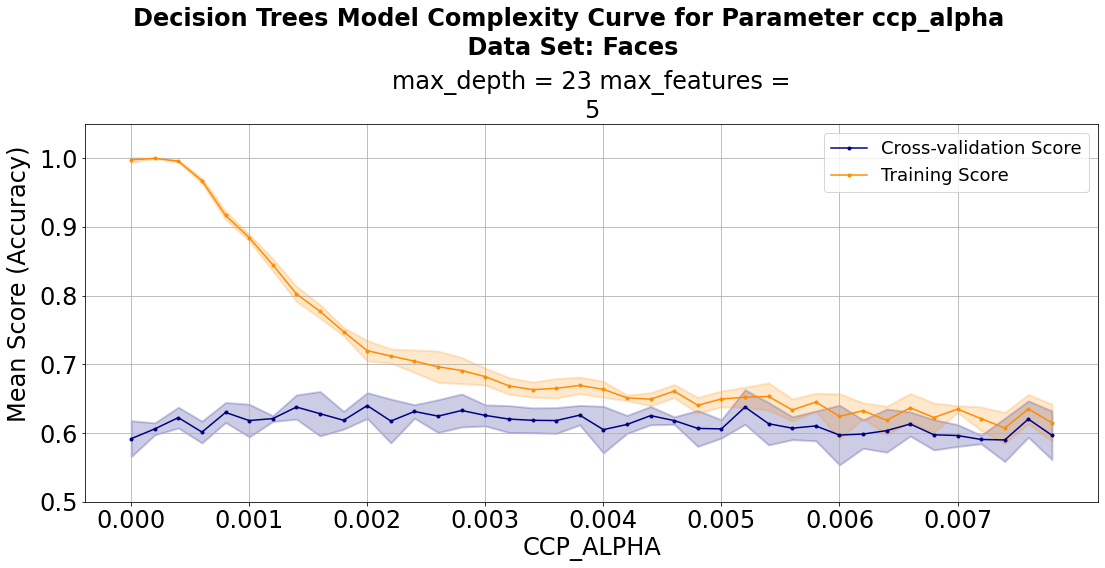

Plot saved as:  Figures/Faces_Decision Trees_GS_ModelComplexity_ccp_alpha_max_depth_max_features.png


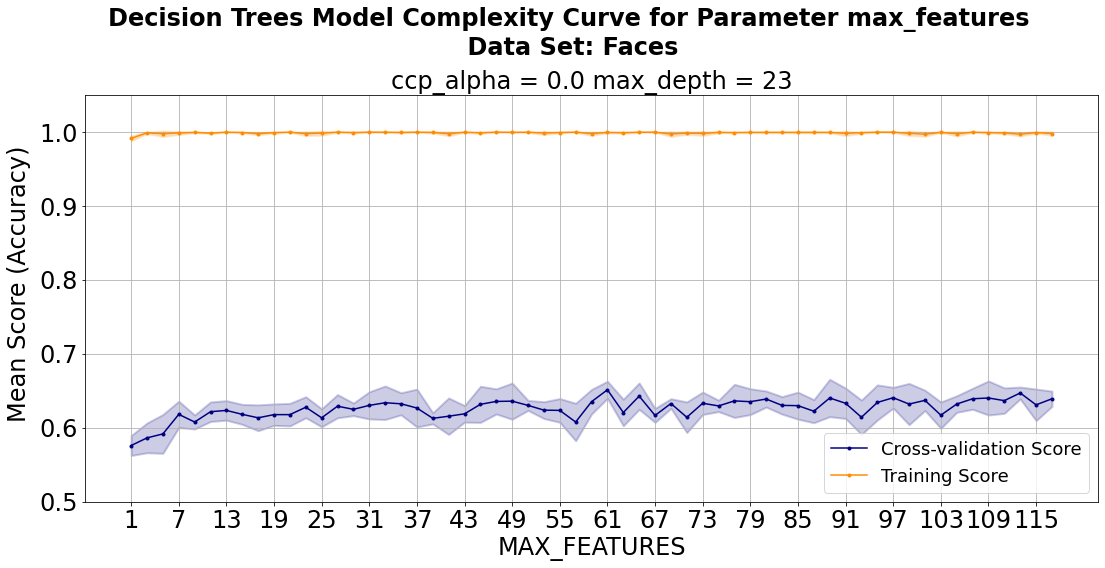

In [15]:
unused_params = {'ccp_alpha': min(ccp_alpha), 'max_depth': max(max_depth), 'max_features': 5}
print(unused_params)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'max_depth', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=1)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'ccp_alpha', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=5)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'max_features', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=3)

{'ccp_alpha': 0.004, 'max_depth': 23, 'max_features': 117}
Plot saved as:  Figures/Faces_Decision Trees_GS_ModelComplexity_ccp_alpha_max_depth_max_features.png


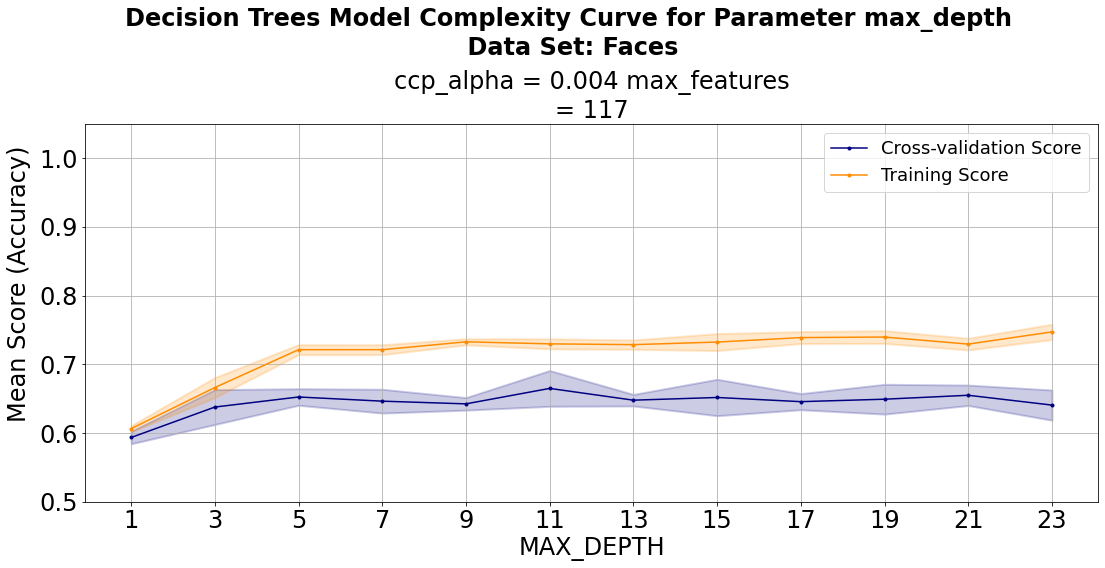

Plot saved as:  Figures/Faces_Decision Trees_GS_ModelComplexity_ccp_alpha_max_depth_max_features.png


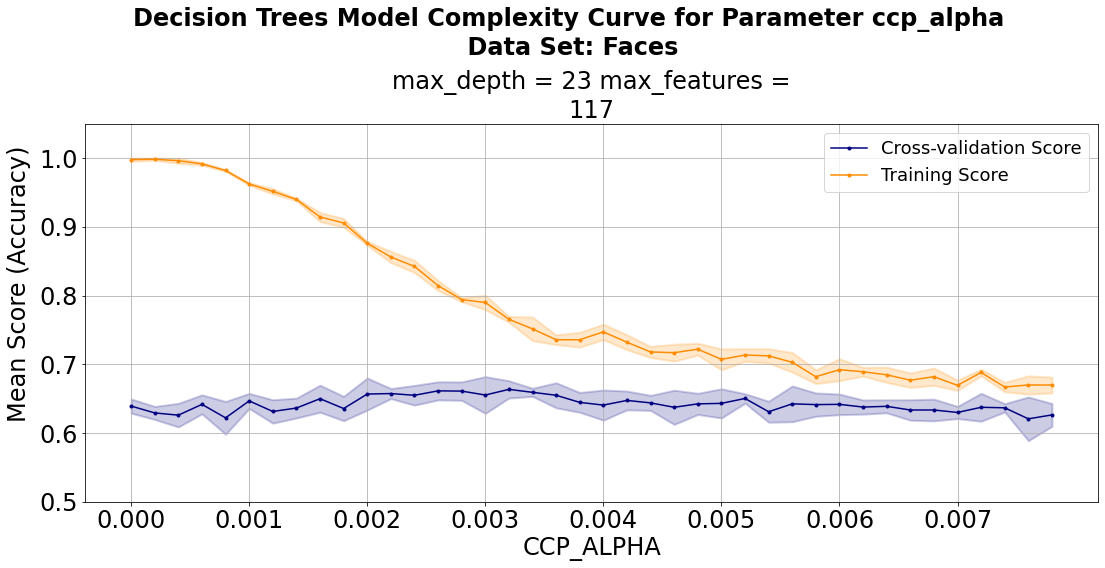

Plot saved as:  Figures/Faces_Decision Trees_GS_ModelComplexity_ccp_alpha_max_depth_max_features.png


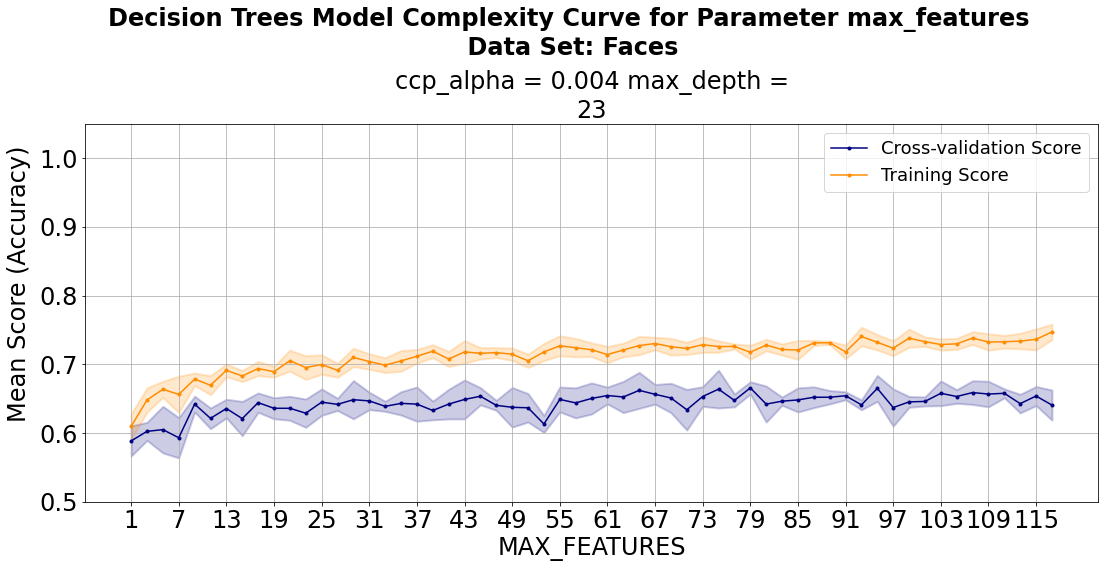

In [16]:
unused_params = {'ccp_alpha': 0.004, 'max_depth': max(max_depth), 'max_features': max(max_features)}
print(unused_params)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'max_depth', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=1)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'ccp_alpha', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=5)
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'max_features', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, ylim=ylim, tick_spacing=3)

Plot saved as:  Figures/Faces_Decision Trees_GS_Times_ccp_alpha_max_depth_max_features.png


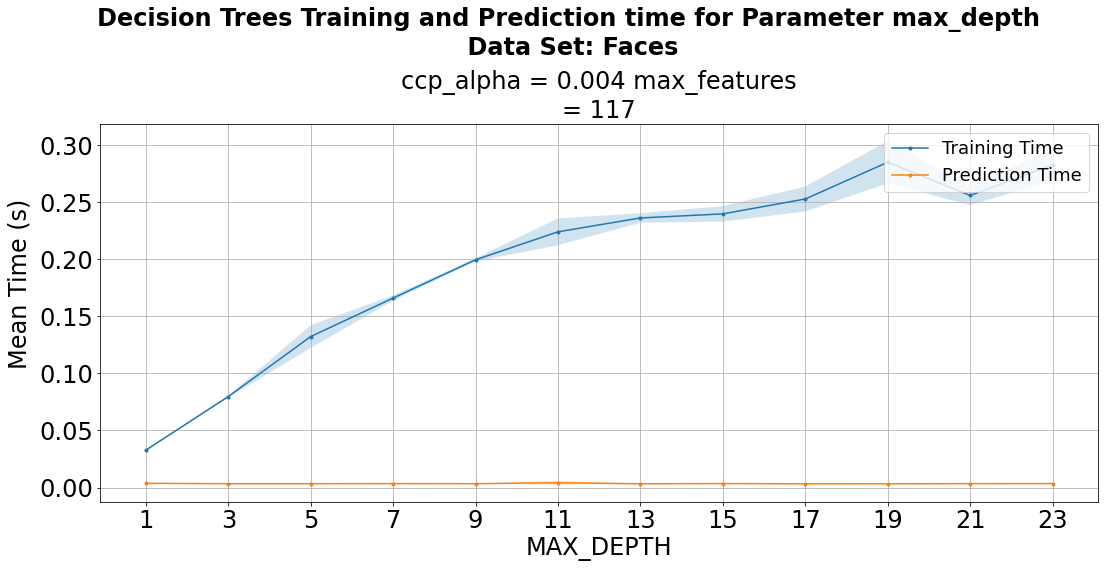

Plot saved as:  Figures/Faces_Decision Trees_GS_Times_ccp_alpha_max_depth_max_features.png


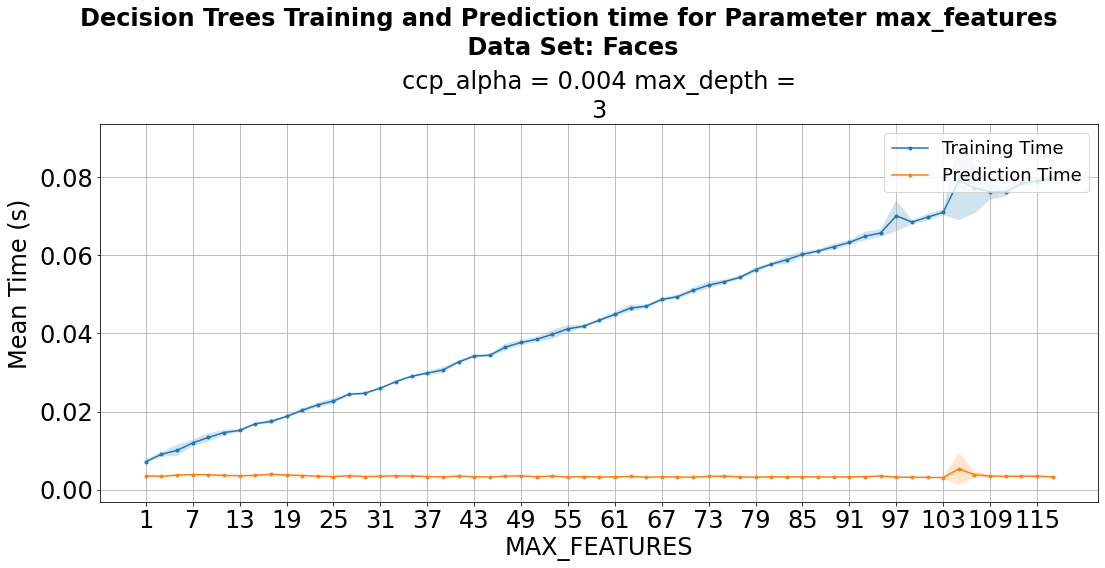

In [17]:
unused_params = {'ccp_alpha': 0.004, 'max_depth': 3, 'max_features': max(max_features)}
common_grid_search_analysis.plot_grid_search_training_times_1param(gs_results, 'max_depth', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, tick_spacing=1)
common_grid_search_analysis.plot_grid_search_training_times_1param(gs_results, 'max_features', PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params, tick_spacing=3)

In [18]:
final_params = {'ccp_alpha': 0.004, 'max_depth': 3, 'criterion': 'gini', 'max_features':19}
train_sizes, train_scores, test_scores, fit_times, score_times = TrainingCurves.perform_learning_curve(tree.DecisionTreeClassifier(**final_params), X_train, y_train, "accuracy")

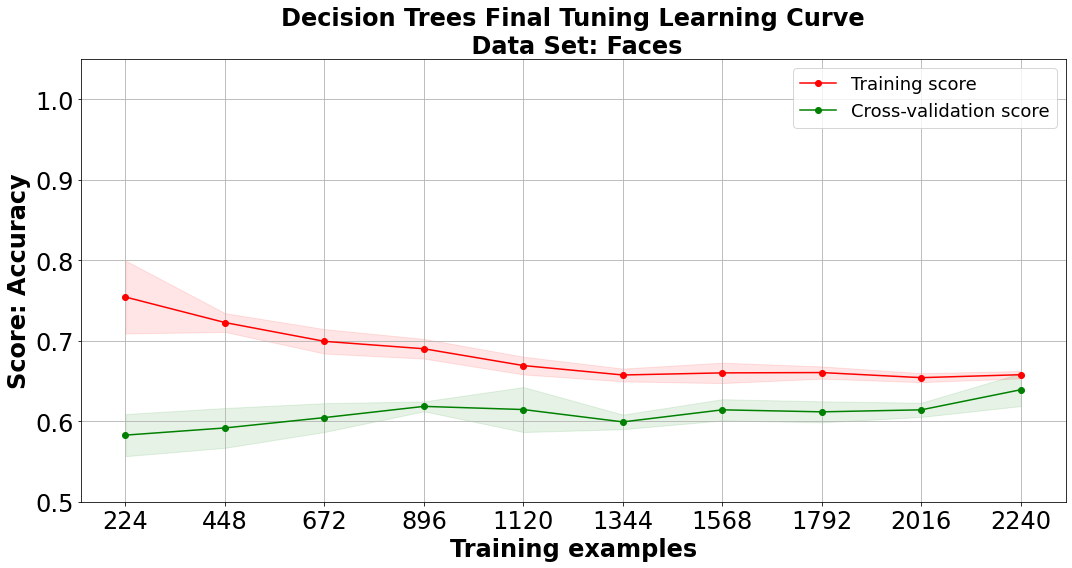

In [19]:
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, final_title, ylim=ylim)

In [20]:
print("Default Fit Time: {} seconds".format(round(np.mean(default_fit_times, axis=1)[-1], 3)))
print("Default Predict Time {} seconds".format(round(np.mean(default_score_times, axis=1)[-1], 3)))
print()
print("Final Fit Time: {} seconds".format(round(np.mean(fit_times, axis=1)[-1], 3)))
print("Final Predict Time: {} seconds".format(round(np.mean(score_times, axis=1)[-1], 3)))

Default Fit Time: 0.323 seconds
Default Predict Time 0.002 seconds

Final Fit Time: 0.011 seconds
Final Predict Time: 0.002 seconds


In [21]:
clf = tree.DecisionTreeClassifier(**final_params)
clf.fit(X_train, y_train)
print("Train Accuracy: {}%".format(round(clf.score(X_train, y_train)*100, 1)))
print("Test Accuracy: {}%".format(round(clf.score(X_test, y_test)*100, 1)))

Train Accuracy: 64.5%
Test Accuracy: 60.4%
